# QB Passing

## Load Data

***NEED TO MANUALLY SELECT WHICH DATA WANT TO EXPLORE***

The data has been pre-processed by `NeuralPassing/features.py`

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter

# Show all columns in DataFrames
pd.options.display.max_columns = None

# SELECT WHICH DATA TO LOAD
#features = pd.read_csv(os.path.join('NeuralPassing', 'Data', 'qbPassingFeatures.csv'), index_col=0, header=[0,1,2])
features = pd.read_csv(os.path.join('NeuralPassing', 'Data', 'qbPassingFeatures_CLEAN.csv'), index_col=0, header=[0,1,2])

## Explore Data

### General

In [2]:
features.dtypes.value_counts()

float64    138
object       7
dtype: int64

In [3]:
features.loc[:,features.dtypes == object]

name        QB                                           
               name home_game                                           
               name         1        2        3        4        5      6
0     Aaron Rodgers   NO_PLAY     True     True    False     True   True
1     Aaron Rodgers     False  NO_PLAY     True     True    False   True
2     Aaron Rodgers     False    False  NO_PLAY     True     True  False
3     Aaron Rodgers      True    False    False  NO_PLAY     True   True
4     Aaron Rodgers     False     True    False    False  NO_PLAY   True
...             ...       ...      ...      ...      ...      ...    ...
1582      Drew Lock      True    False    False  NO_PLAY     True  False
1583     Drew Brees   NO_PLAY     True    False     True    False   True
1584     Drew Brees      True  NO_PLAY     True    False     True  False
1585     Drew Brees     False     True  NO_PLAY     True    False   True
1586     Drew Brees     False    False     True  NO_PLAY     True  False

[1380 rows x 7 columns]

In [4]:
features.describe()

week       season           QB                            \
              week       season     pass_cmp     pass_att     pass_yds   
              week       season            1            1            1   
count  1380.000000  1380.000000  1380.000000  1380.000000  1380.000000   
mean     11.606522    17.468841    22.196739    34.401920   252.319638   
std       2.881179     1.690236     5.826046     8.226299    71.336362   
min       7.000000    15.000000     1.000000     5.000000     4.000000   
25%       9.000000    16.000000    18.000000    29.000000   207.000000   
50%      12.000000    17.000000    22.000000    34.000000   251.000000   
75%      14.000000    19.000000    26.000000    39.100000   297.200000   
max      16.000000    20.000000    44.000000    66.000000   513.000000   

                                                                        \
           pass_td     pass_int  pass_sacked     rush_att     rush_yds   
                 1            1            1            1            1   
count  1380.000000  1380.000000  1380.000000  1380.000000  1380.000000   
mean      1.682826     0.702572     2.151413     3.225507    14.372174   
std       1.152487     0.827975     1.569252     2.689830    18.926188   
min       0.000000     0.000000     0.000000     0.000000   -12.000000   
25%       1.000000     0.000000     1.000000     1.000000     0.000000   
50%       2.000000     0.600000     2.000000     3.000000     8.000000   
75%       2.000000     1.000000     3.000000     4.000000    22.000000   
max       7.000000     5.000000    11.000000    19.000000   152.000000   

                                                                        \
           rush_td     pass_cmp     pass_att     pass_yds      pass_td   
                 1            2            2            2            2   
count  1380.000000  1380.000000  1380.000000  1380.000000  1380.000000   
mean      0.164239    22.178732    34.473370   253.635326     1.683768   
std       0.386729     5.814834     8.236715    71.072889     1.134802   
min       0.000000     1.000000     5.000000     4.000000     0.000000   
25%       0.000000    18.000000    29.000000   207.450000     1.000000   
50%       0.000000    22.000000    34.000000   253.000000     2.000000   
75%       0.000000    26.000000    39.300000   300.000000     2.000000   
max       2.000000    44.000000    66.000000   506.000000     7.000000   

                                                                        \
          pass_int  pass_sacked     rush_att     rush_yds      rush_td   
                 2            2            2            2            2   
count  1380.000000  1380.000000  1380.000000  1380.000000  1380.000000   
mean      0.744312     2.163370     3.267609    14.352391     0.158043   
std       0.848766     1.575149     2.689942    18.793026     0.376408   
min       0.000000     0.000000     0.000000   -12.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.800000     0.000000   
50%       0.800000     2.000000     3.000000     8.000000     0.000000   
75%       1.000000     3.000000     4.600000    22.000000     0.000000   
max       5.000000    10.000000    16.000000   124.000000     2.000000   

                                                                        \
          pass_cmp     pass_att     pass_yds      pass_td     pass_int   
                 3            3            3            3            3   
count  1380.000000  1380.000000  1380.000000  1380.000000  1380.000000   
mean     22.221449    34.453261   253.944855     1.683587     0.707319   
std       5.888027     8.400618    72.590728     1.140090     0.826872   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      18.787500    29.000000   205.750000     1.000000     0.000000   
50%      22.000000    34.000000   252.000000     2.000000     0.600000   
75%      26.000000    39.400000   300.000000     2.000000     1.000000   
max      45.00

### Feature Histograms

#### Label

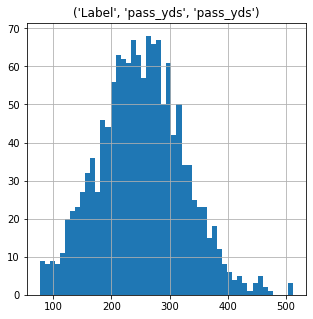

In [5]:
%matplotlib inline
features[[('Label', 'pass_yds', 'pass_yds')]].hist(bins=50, figsize=(5,5))
plt.show()

#### QB Pass Completion

**N.B.** Peak due to missing weeks populated with median values

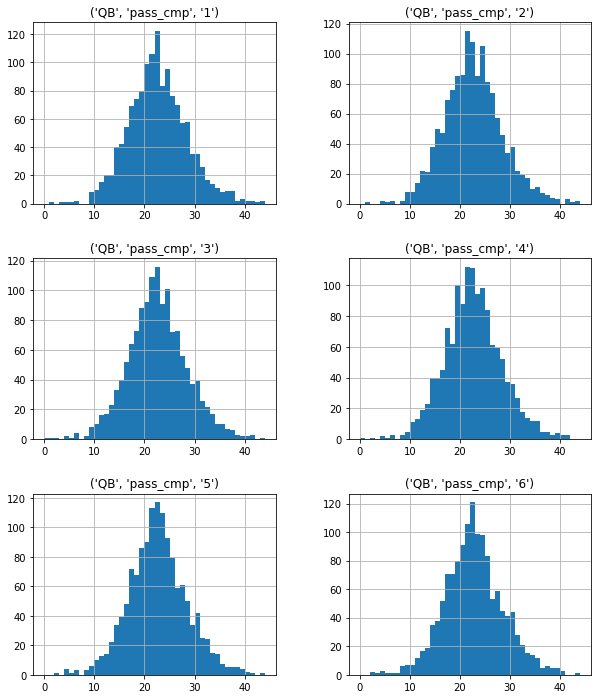

In [6]:
features[[('QB', 'pass_cmp', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'pass_cmp', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Pass Attempts

In [7]:
np.arange(-0.5,10,1)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

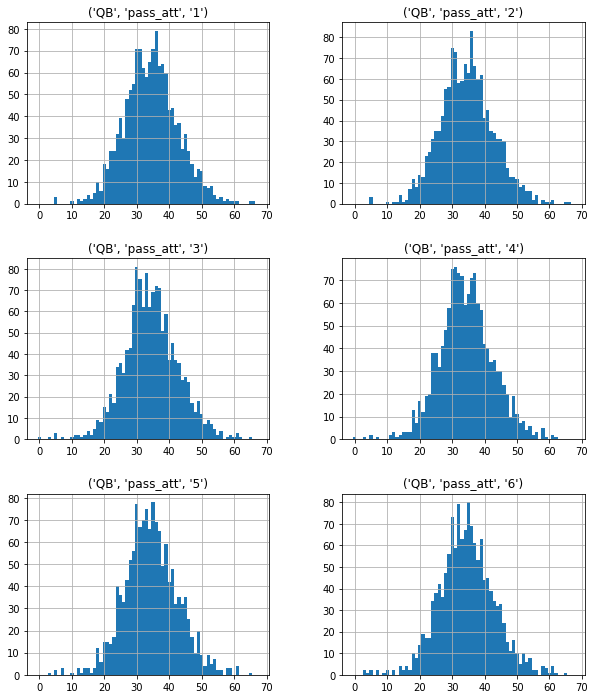

In [8]:
features[[('QB', 'pass_att', str(i)) for i in range(1,7)]].hist(bins=np.arange(-0.5,int(features[[('QB', 'pass_att', str(i)) for i in range(1,7)]].max().max()),1), figsize=(10,12))
plt.show()

#### QB Pass Yards

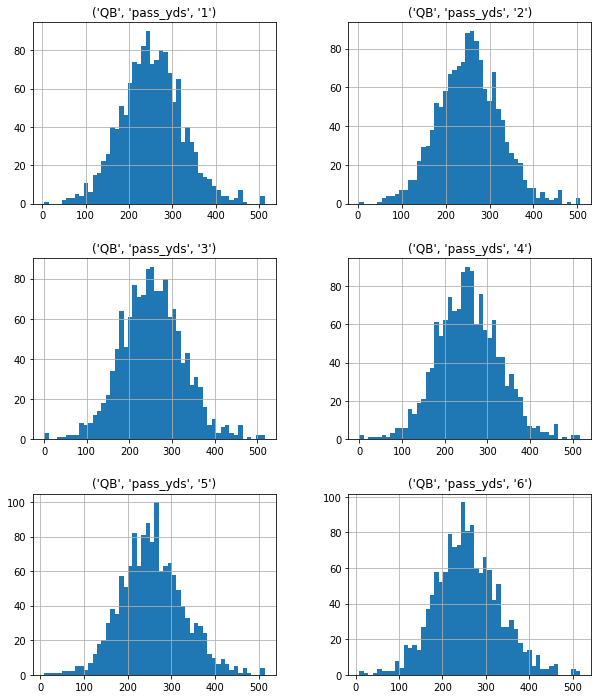

In [9]:
features[[('QB', 'pass_yds', str(i)) for i in range(1,7)]].hist(bins=50, figsize=(10,12))
plt.show()

#### QB Pass TDs

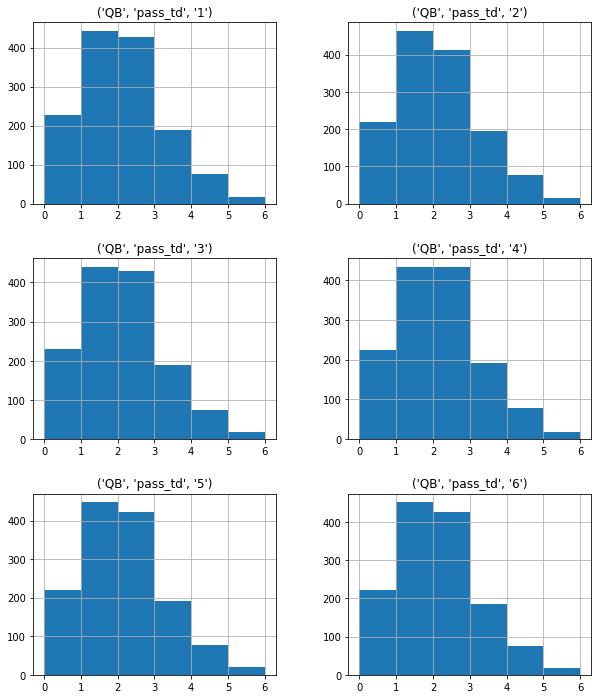

In [10]:
features[[('QB', 'pass_td', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'pass_td', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Pass INTs

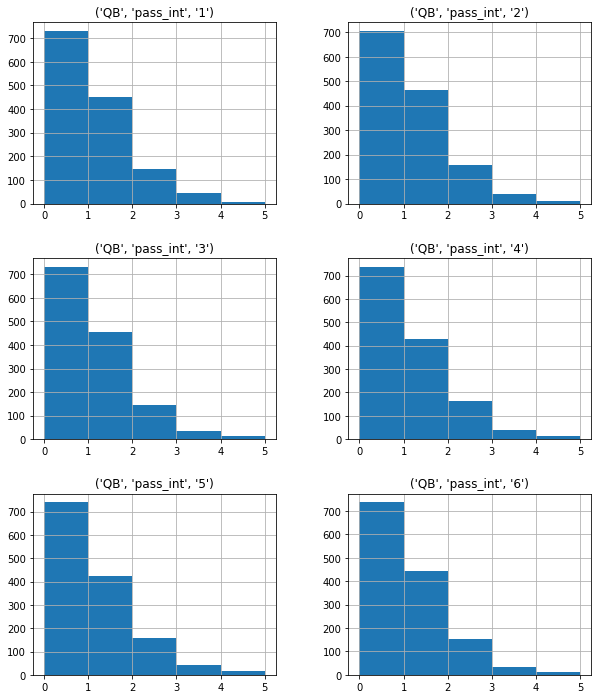

In [11]:
features[[('QB', 'pass_int', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'pass_int', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Pass Sacks

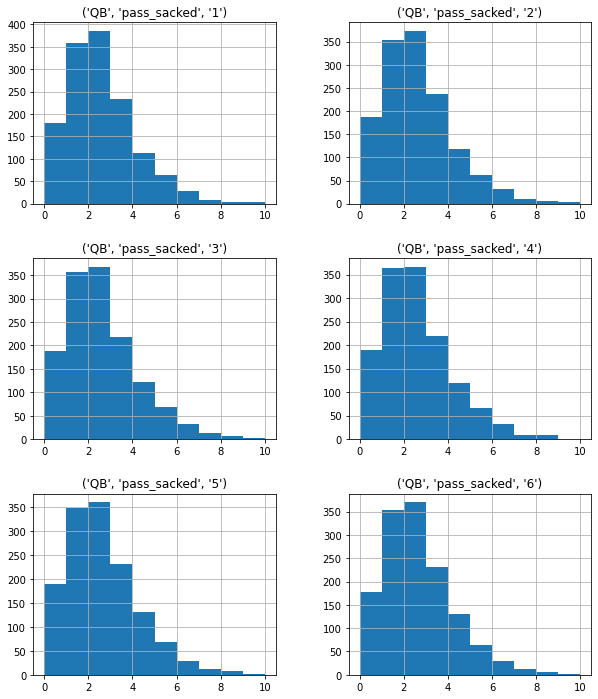

In [12]:
features[[('QB', 'pass_sacked', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'pass_sacked', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Rush Attempts

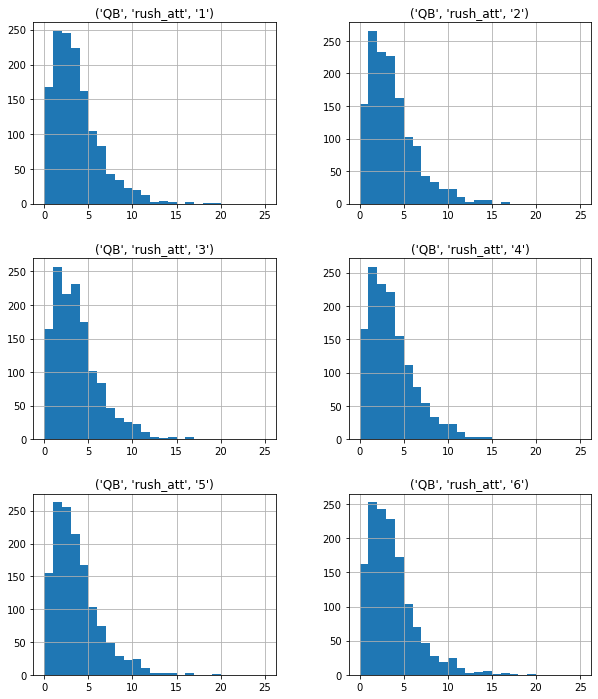

In [13]:
features[[('QB', 'rush_att', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'rush_att', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### QB Rush Yards

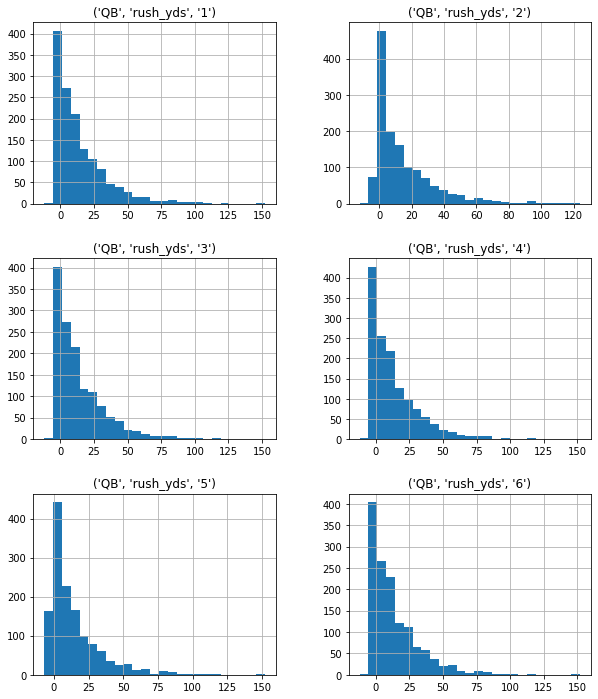

In [14]:
features[[('QB', 'rush_yds', str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### QB Rush TDs

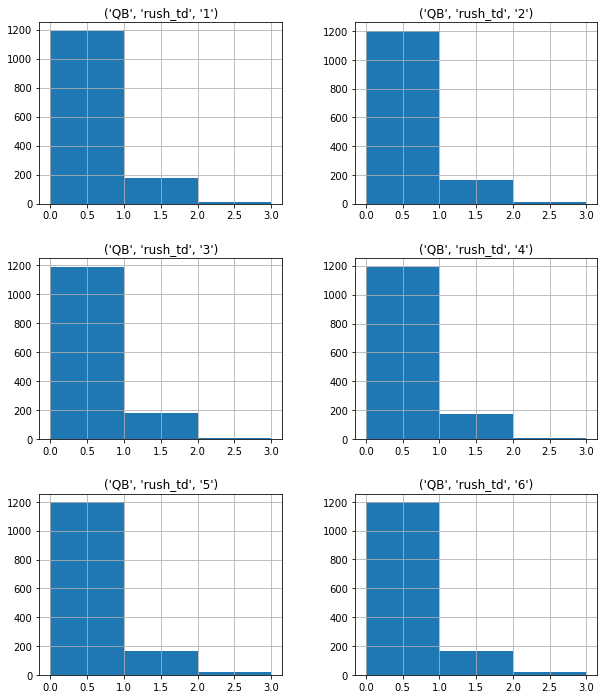

In [15]:
features[[('QB', 'rush_td', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('QB', 'rush_td', str(i)) for i in range(1,7)]].max().max())+2), figsize=(10,12))
plt.show()

#### Offence Rush Attempts

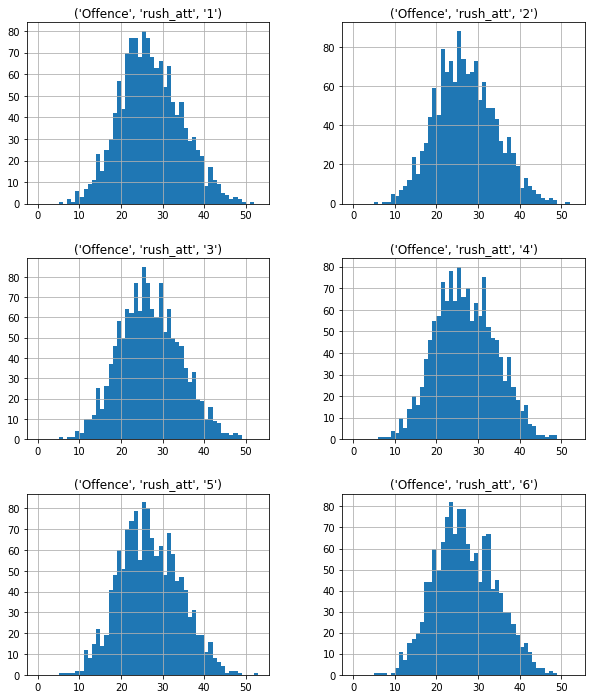

In [16]:
features[[('Offence', 'rush_att', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Offence', 'rush_att', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Offence Rush Yards

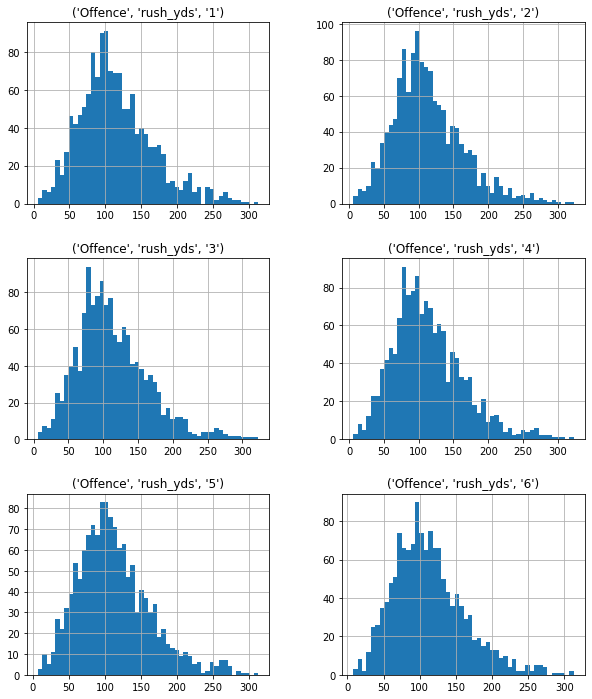

In [17]:
features[[('Offence', 'rush_yds', str(i)) for i in range(1,7)]].hist(bins=50, figsize=(10,12))
plt.show()

#### Offence Rush TDs

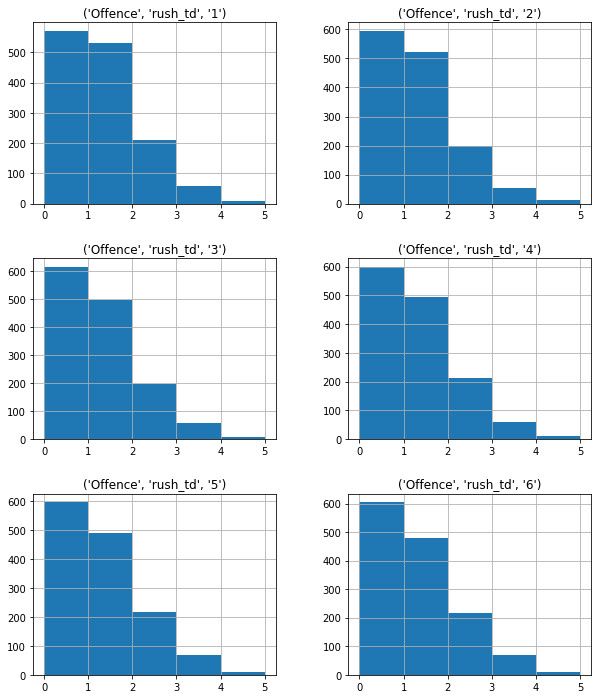

In [18]:
features[[('Offence', 'rush_td', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Offence', 'rush_td', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Defence (previous) - Pass Completions

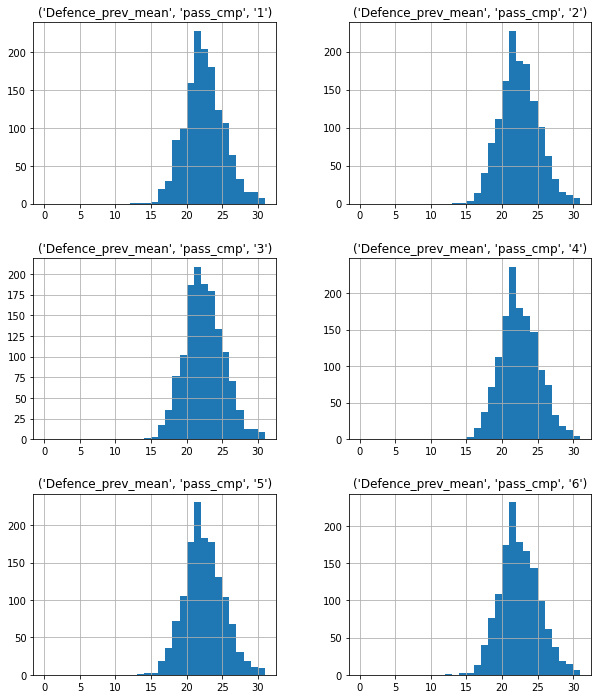

In [19]:
features[[('Defence_prev_mean', 'pass_cmp', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Defence_prev_mean', 'pass_cmp', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Defence (previous) - Pass Attempts

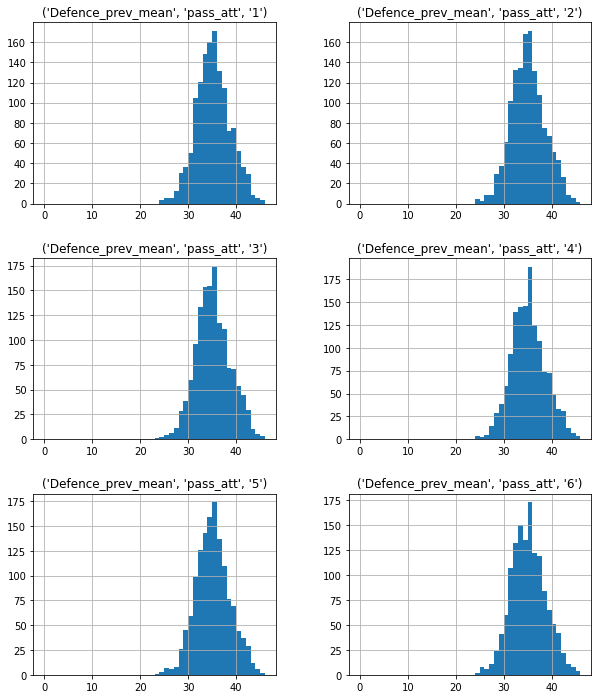

In [20]:
features[[('Defence_prev_mean', 'pass_att', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Defence_prev_mean', 'pass_att', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Defence (previous) - Pass Yards

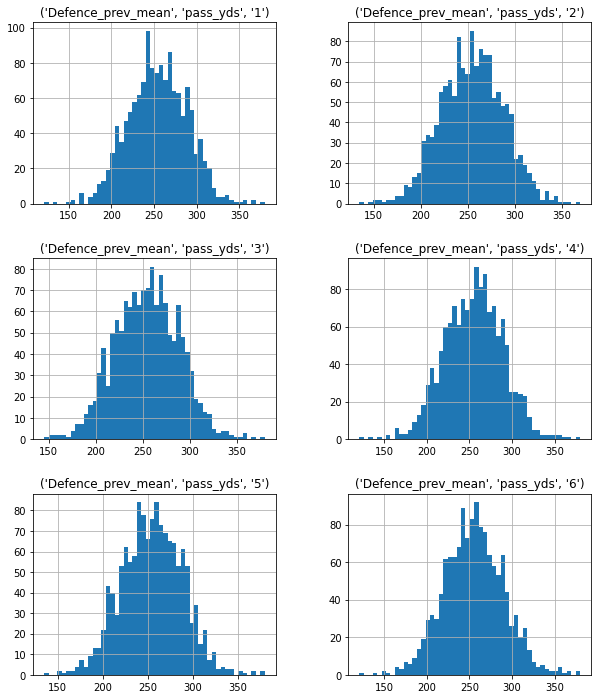

In [21]:
features[[('Defence_prev_mean', 'pass_yds', str(i)) for i in range(1,7)]].hist(bins=50, figsize=(10,12))
plt.show()

#### Defence (previous) - Pass TDs

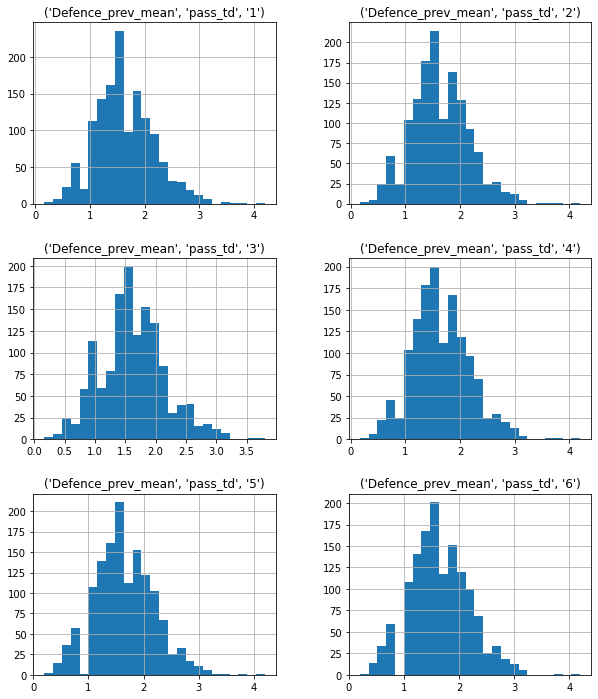

In [22]:
features[[('Defence_prev_mean', 'pass_td', str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### Defence (previous) - Pass INTs

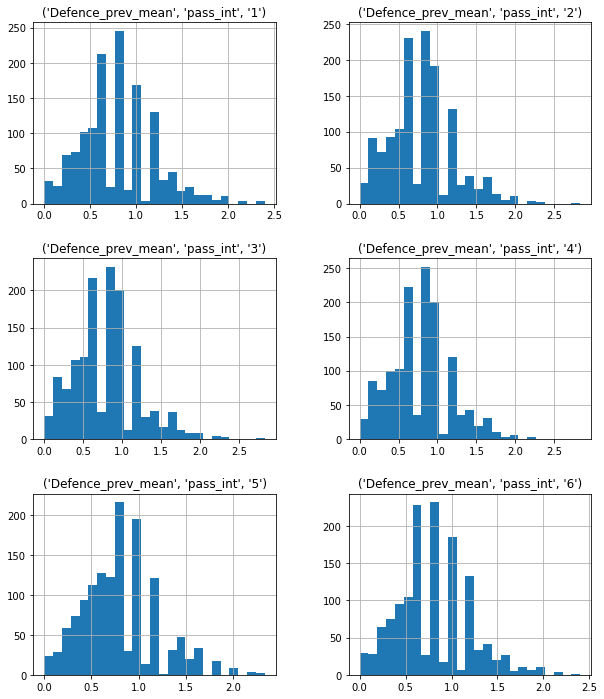

In [23]:
features[[('Defence_prev_mean', 'pass_int', str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### Defence (previous) - Sacks

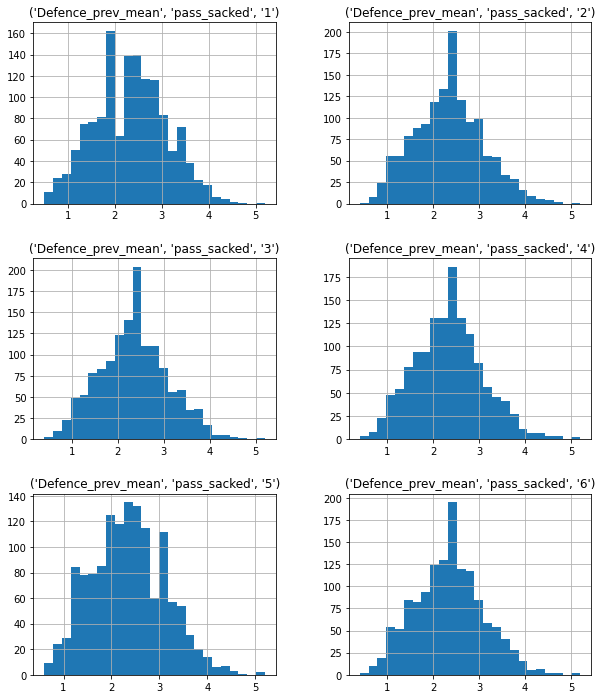

In [24]:
features[[('Defence_prev_mean', 'pass_sacked', str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### Defence (previous) - Rush Attempts

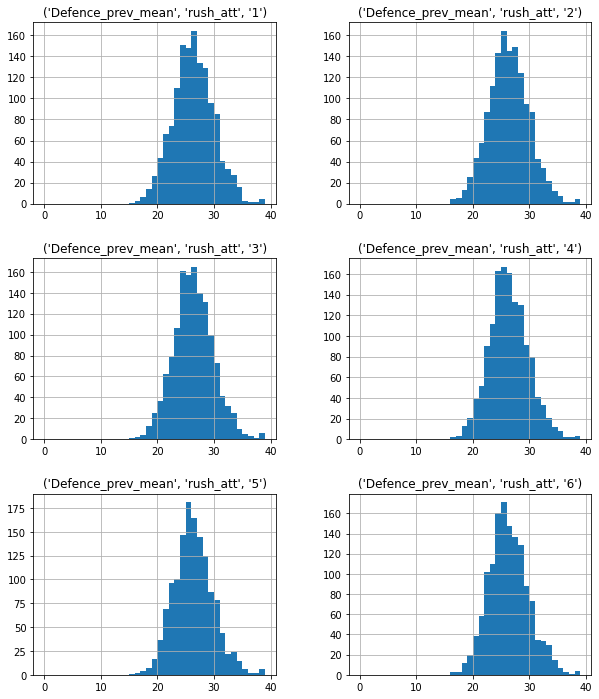

In [25]:
features[[('Defence_prev_mean', 'rush_att', str(i)) for i in range(1,7)]].hist(bins=range(int(features[[('Defence_prev_mean', 'rush_att', str(i)) for i in range(1,7)]].max().max())), figsize=(10,12))
plt.show()

#### Defence (previous) - Rush Yards

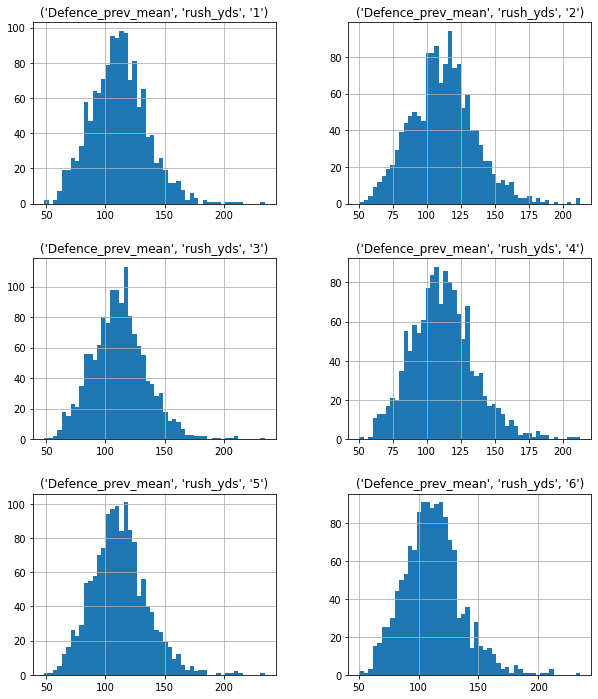

In [26]:
features[[('Defence_prev_mean', 'rush_yds', str(i)) for i in range(1,7)]].hist(bins=50, figsize=(10,12))
plt.show()

#### Defence (previous) - Rush TDs

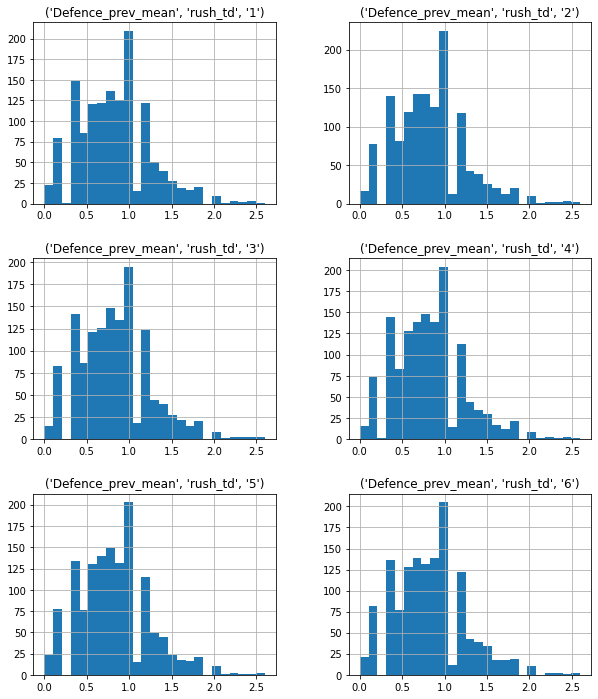

In [27]:
features[[('Defence_prev_mean', 'rush_td', str(i)) for i in range(1,7)]].hist(bins=25, figsize=(10,12))
plt.show()

#### Defence (upcoming)

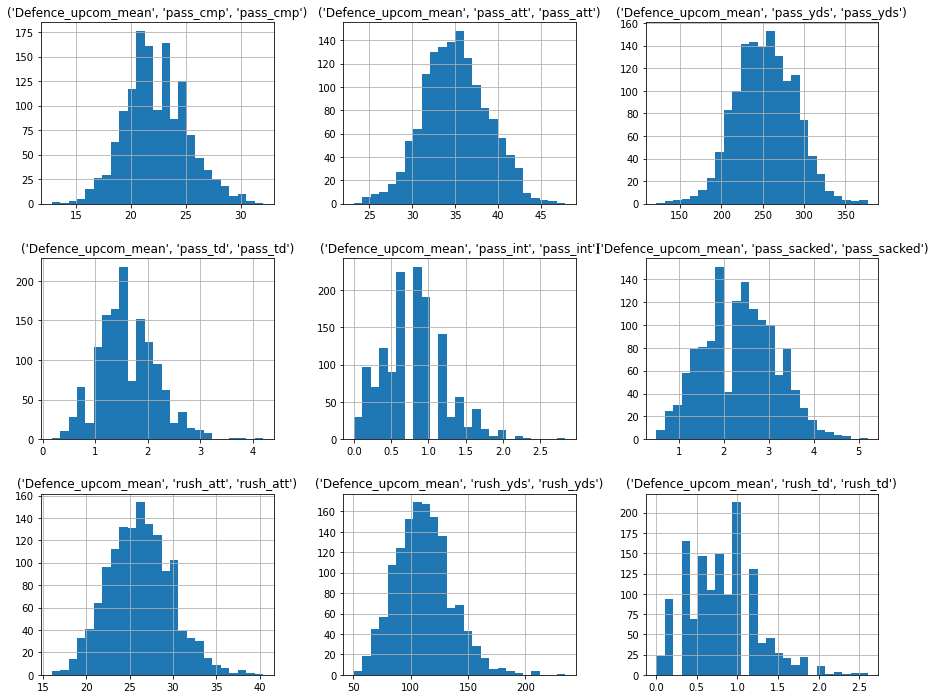

In [28]:
features[['Defence_upcom_mean']].hist(bins=25, figsize=(15,12))
plt.show()

### Look for patterns

In [29]:
correlation_matrix = features.corr()
correlation_matrix[('Label', 'pass_yds', 'pass_yds')].sort_values(ascending=False)

Label  pass_yds  pass_yds    1.000000
QB     pass_yds  2           0.176192
                 1           0.173456
                 6           0.171607
                 3           0.167072
                               ...   
       rush_yds  3          -0.130186
       rush_att  3          -0.131255
       rush_yds  2          -0.134299
       rush_att  4          -0.139430
       rush_yds  4          -0.149780
Name: (Label, pass_yds, pass_yds), Length: 138, dtype: float64

In [30]:
features_ordered = list(correlation_matrix[('Label', 'pass_yds', 'pass_yds')].sort_values(ascending=False).index)

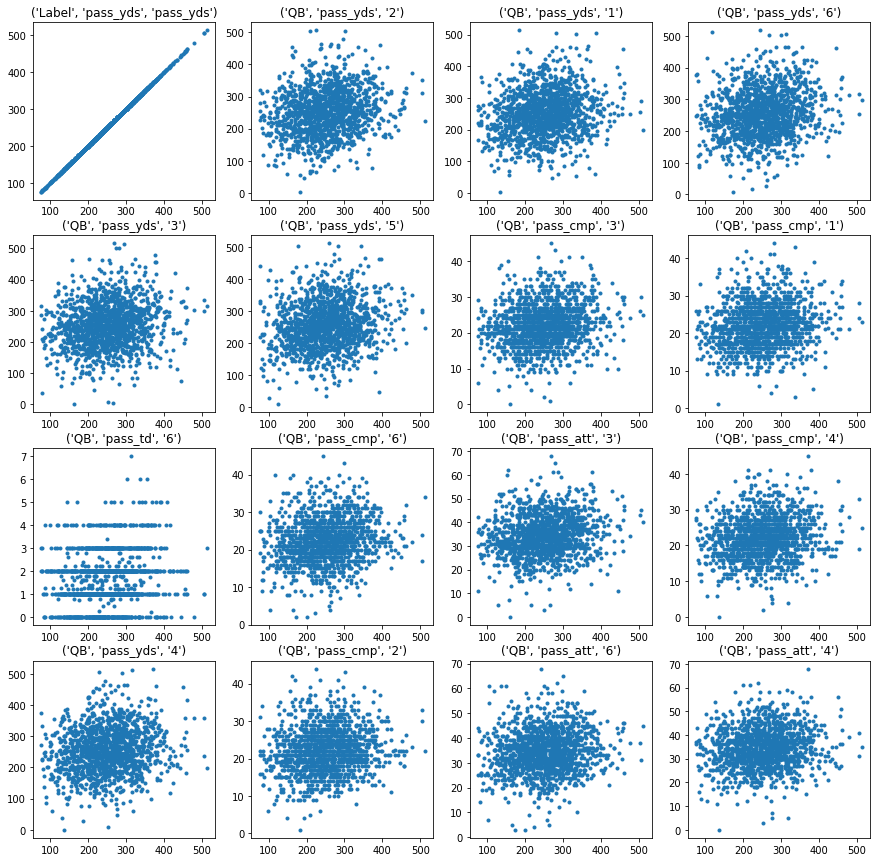

In [31]:
f, axs = plt.subplots(2,2,figsize=(15,15))

for i, f in enumerate(features_ordered[:16]):
    plt.subplot(4,4,i+1)
    plt.plot(features[('Label', 'pass_yds', 'pass_yds')], features[f], linestyle='None', marker='.')
    plt.title(f)
    
plt.show()

Investigate whether there's simple correlation between QBPassing/DEFPassing with Label/DEFPassing

In [32]:
engineered = pd.DataFrame()

for i in range(1,7):
    engineered['QB_DEF_' + str(i)] = features[('QB', 'pass_yds', str(i))] / features[('Defence_prev_mean', 'pass_yds', str(i))]

engineered['Label_DEF'] = features[('Label', 'pass_yds', 'pass_yds')] / features[('Defence_upcom_mean', 'pass_yds', 'pass_yds')]

print(engineered.corr()['Label_DEF'])

QB_DEF_1     0.199188
QB_DEF_2     0.138673
QB_DEF_3     0.165346
QB_DEF_4     0.140354
QB_DEF_5     0.172840
QB_DEF_6     0.126536
Label_DEF    1.000000
Name: Label_DEF, dtype: float64


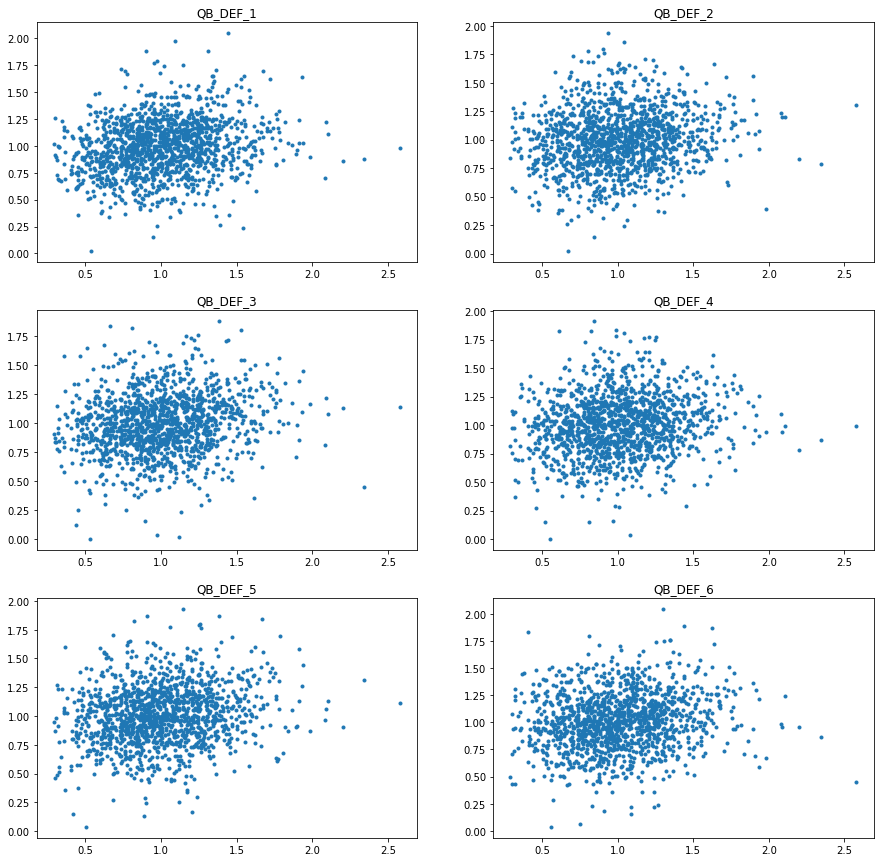

In [33]:
f, axs = plt.subplots(3,2,figsize=(15,15))

for i, ax in enumerate(axs.flat):
    ax.plot(engineered['Label_DEF'], engineered['QB_DEF_'+str(i+1)], linestyle='None', marker='.')
    ax.set_title('QB_DEF_'+str(i+1))
    #ax.set_ylim([0.8,1.2])

    
plt.show()

# TODO DATA

* remove Taysom Hill types (e.g. by fewer than 10 pass attempts)